In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# 加载示例数据
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79]
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 75]

In [8]:
x = np.array(x, dtype=np.float64)
y = np.array(y, dtype=np.float64)

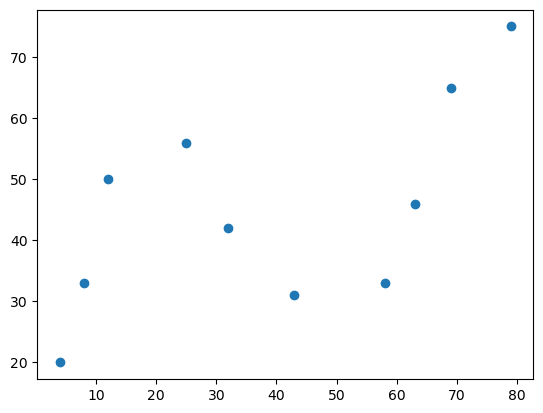

In [4]:
plt.scatter(x, y)

In [13]:
from scipy.optimize import leastsq

def f(n, x):
    f = np.poly1d(n)
    return f(x)

def error(n, x, y):
    return f(n, x) - y

def n_poly(n):
    w = np.random.normal(0, 1, n)
    w = leastsq(error, w, args=(x, y))
    return w

In [18]:
w = n_poly(5)

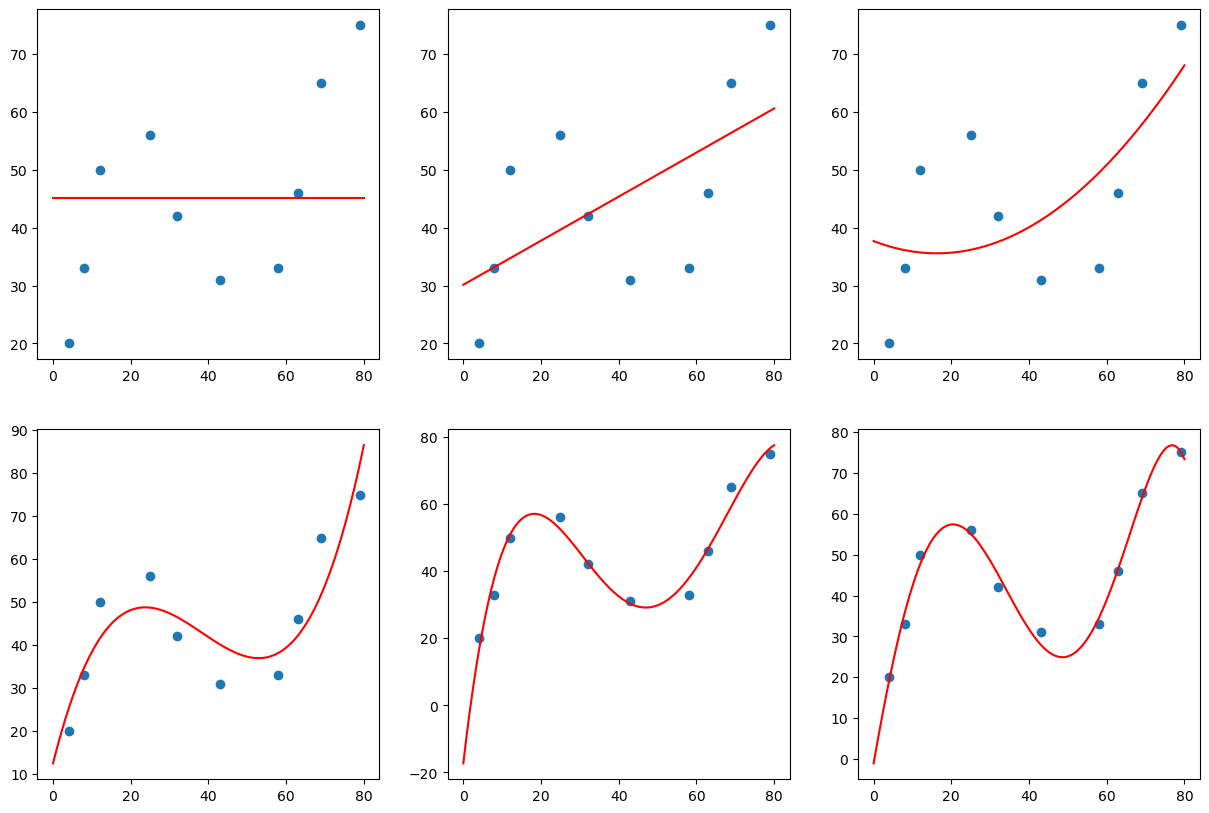

In [21]:
x_Tmp = np.linspace(0, 80, 100)


fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    w = n_poly(i+1)
    y_Tmp = f(w[0], x_Tmp)
    axes[int(i/3), i%3].scatter(x, y)   
    axes[int(i/3), i%3].plot(x_Tmp, y_Tmp, 'r')

scikit-learn 拟合

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

poly_x = PolynomialFeatures(degree = 2, include_bias=False).fit_transform(x)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_x, y)